In [3]:
head pulsars.csv

SyntaxError: invalid syntax (115611957.py, line 1)

     Source Name       RA (HMS)      Dec (DMS)    RA (deg)  Dec (deg)
0     J0002+6216    00:02:58.17    +62:16:09.4    0.742375  62.269278
1     J0006+1834     00:06:04.8      +18:34:59    1.520000  18.583056
2     J0007+7303     00:07:01.7    +73:03:07.4    1.757083  73.052056
3       J0011+08       00:11:34         +08:10    2.891667   8.166667
4     J0012+5431     00:12:23.3      +54:31:47    3.097083  54.529722
...          ...            ...            ...         ...        ...
3384  J2354+6155  23:54:04.7830  +61:55:46.845  358.519929  61.929679
3385    J2354-22       23:54:26      -22:51:53  358.608333 -22.864722
3386  J2355+0051  23:55:51.2885    00:51:09.57  358.963702   0.852658
3387  J2355+1523    23:55:48.62      +15:23:18  358.952583  15.388333
3388  J2355+2246     23:55:49.8      +22:46:17  358.957500  22.771389

[3389 rows x 5 columns]


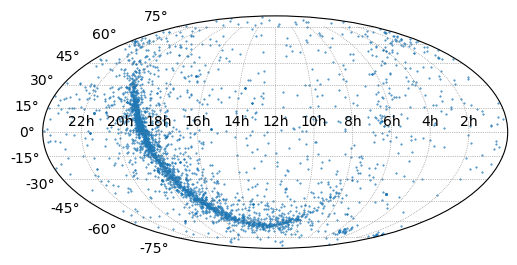

In [4]:
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
from numpy import radians

# Read the CSV file into a DataFrame
df = pd.read_csv('pulsars.csv')

# Add new columns to df
df['RA (deg)']  = 0
df['Dec (deg)'] = 0

# Loop over dataframe and convert RA and Dec to degrees
for index, row in df.iterrows():
    ra_hms  = row['RA (HMS)']
    dec_hms = row['Dec (DMS)']

    # Create a SkyCoord object and specify the units
    c = SkyCoord(ra=ra_hms, dec=dec_hms, unit=(u.hourangle, u.deg))
    # Access the converted RA and Dec in degrees
    ra_deg  = c.ra.deg
    dec_deg = c.dec.deg

    # Update the DataFrame with the converted values
    df.at[index, 'RA (deg)']  = ra_deg
    df.at[index, 'Dec (deg)'] = dec_deg

# Print the DataFrame to check the degree calculation
print(df)

# Plot the pulsars
fig = plt.figure(figsize=(6, 4))
# Molleweide projection gives us a nice view of the whole sky
ax = plt.axes(projection='mollweide')
plt.grid(True, color='gray', lw=0.5, linestyle='dotted')
ax.set_xticklabels(['22h', '20h', '18h', '16h', '14h','12h','10h', '8h', '6h', '4h', '2h'])

# Convert RA and Dec to radians and plot
ax.scatter(radians(-df['RA (deg)'] + 180), radians(df['Dec (deg)']), s=0.2)
plt.savefig("pulsar_plot.png", dpi=300, bbox_inches='tight')